# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
df = pd.read_csv("user_knowledge.csv", sep = ";")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0,0,0,0,0,very_low
1,"0,08","0,08","0,1","0,24","0,9",High
2,"0,06","0,06","0,05","0,25","0,33",Low
3,"0,1","0,1","0,15","0,65","0,3",Middle
4,"0,08","0,08","0,08","0,98","0,24",Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STG     403 non-null    object
 1   SCG     403 non-null    object
 2   STR     403 non-null    object
 3   LPR     403 non-null    object
 4   PEG     403 non-null    object
 5    UNS    403 non-null    object
dtypes: object(6)
memory usage: 19.0+ KB


In [ ]:
df.columns[:-1] # we don't want to change the type of UNS column

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG'], dtype='object')

In [ ]:
for col in df.columns[:-1]:
  df[col] = df[col].str.replace("," , ".")
  df[col] = df[col].astype(float)

In [ ]:
df = df.rename(columns= {" UNS" : "UNS"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [ ]:
df["UNS"].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [ ]:
df["UNS"] = df["UNS"].str.replace("very_low", "Very Low")

In [ ]:
df["UNS"].value_counts() # average distribution data

Low         129
Middle      122
High        102
Very Low     50
Name: UNS, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STG,403.0,0.353141,0.212018,0.0,0.200,0.30,0.48,0.99
SCG,403.0,0.355940,0.215531,0.0,0.200,0.30,0.51,0.90
STR,403.0,0.457655,0.246684,0.0,0.265,0.44,0.68,0.95
LPR,403.0,0.431342,0.257545,0.0,0.250,0.33,0.65,0.99
PEG,403.0,0.456360,0.266775,0.0,0.250,0.40,0.66,0.99


In [ ]:
# The type of our UNS column is object, we need to encode it to convert it to numerical data. Data type will turn in int64.
df["UNS"] = df["UNS"].replace({"Very Low", "Low", "Middle", "High"}, [0, 1, 2, 3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 KB


<Axes: >

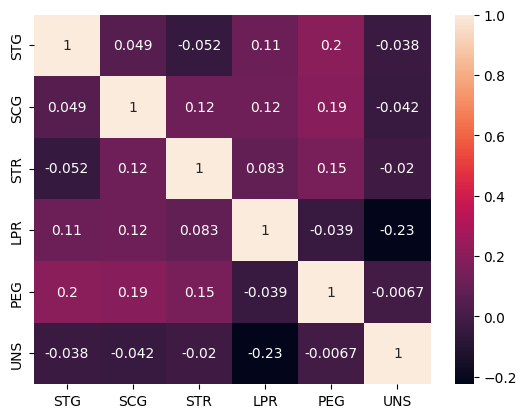

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

*** LDA ile bu datayı 2 boyutlu hale getir

# Modelling

In [ ]:
X = df.drop("UNS", axis=1)
y = df["UNS"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [ ]:
print(f"X in shape {X.shape}")
print(f"X train in shape {X_train.shape}")
print(f"X test in shape {X_test.shape}")

X in shape (403, 5)
X train in shape (322, 5)
X test in shape (81, 5)


In [ ]:
print(f"y in shape {y.shape}")
print(f"y train in shape {y_train.shape}")
print(f"y test in shape {y_test.shape}")

y in shape (403,)
y train in shape (322,)
y test in shape (81,)


# Model Time

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model= DecisionTreeClassifier(criterion="entropy",
                       splitter = "best",
                       max_depth = 7,
                       min_samples_split= 3,
                       max_features = 5,
                       random_state = 5
                       )

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_split=3, random_state=5)

In [ ]:
dt_model_y_pred = dt_model.predict(X_test)
dt_model_y_pred

array([2, 0, 2, 2, 3, 1, 3, 0, 2, 0, 1, 3, 2, 1, 2, 0, 1, 0, 2, 3, 2, 1,
       2, 0, 2, 0, 1, 3, 1, 0, 1, 3, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 3, 3,
       2, 2, 2, 1, 1, 0, 0, 3, 2, 1, 0, 1, 1, 1, 0, 2, 3, 0, 3, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 0])

In [ ]:
np.array(y_test)

array([2, 0, 2, 2, 0, 1, 3, 0, 2, 0, 1, 3, 2, 1, 2, 0, 1, 0, 2, 3, 2, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0,
       2, 2, 2, 1, 2, 0, 0, 3, 2, 1, 2, 1, 1, 1, 2, 2, 3, 0, 3, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, dt_model_y_pred)

0.9012345679012346

In [ ]:
print(classification_report(y_test, dt_model_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.96      0.96      0.96        23
           2       0.96      0.85      0.90        26
           3       0.79      1.00      0.88        11

    accuracy                           0.90        81
   macro avg       0.89      0.91      0.90        81
weighted avg       0.91      0.90      0.90        81



In [ ]:
confusion_matrix(y_test, dt_model_y_pred)

array([[18,  0,  0,  3],
       [ 0, 22,  1,  0],
       [ 3,  1, 22,  0],
       [ 0,  0,  0, 11]])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
dt_model= DecisionTreeClassifier(criterion="entropy",
                       splitter = "best",
                       max_depth = 7,
                       min_samples_split= 3,
                       max_features = 5,
                       random_state = 5
                       )

In [ ]:
cross_val_score(dt_model, X, y, cv=5)

array([0.88888889, 0.9382716 , 0.9382716 , 0.925     , 0.9125    ])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 200,
                                  criterion ="gini",
                                  min_samples_split = 5,
                                  max_features = 3,
                                  bootstrap= True,
                                  max_samples = 0.6,
                                  )
# you should do optimization steps(hyperparameter tuning) to get good score from the data,
# our data is simple but in complex datasets this manuel values are not useful.

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, max_samples=0.6, min_samples_split=5,
                       n_estimators=200)

In [ ]:
rf_model_y_pred = rf_model.predict(X_test)
rf_model_y_pred

array([2, 0, 2, 2, 0, 1, 3, 0, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 2, 3, 2, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0,
       2, 2, 2, 1, 1, 0, 0, 3, 2, 1, 2, 1, 1, 1, 0, 2, 3, 0, 3, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 0])

In [ ]:
np.array(y_test)

array([2, 0, 2, 2, 0, 1, 3, 0, 2, 0, 1, 3, 2, 1, 2, 0, 1, 0, 2, 3, 2, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0,
       2, 2, 2, 1, 2, 0, 0, 3, 2, 1, 2, 1, 1, 1, 2, 2, 3, 0, 3, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 0])

In [ ]:
accuracy_score(y_test, rf_model_y_pred)

0.9629629629629629

In [ ]:
print(classification_report(y_test, rf_model_y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.96      1.00      0.98        23
           2       1.00      0.88      0.94        26
           3       1.00      1.00      1.00        11

    accuracy                           0.96        81
   macro avg       0.97      0.97      0.97        81
weighted avg       0.97      0.96      0.96        81



In [ ]:
confusion_matrix(y_test, rf_model_y_pred)

array([[21,  0,  0,  0],
       [ 0, 23,  0,  0],
       [ 2,  1, 23,  0],
       [ 0,  0,  0, 11]])

# Modelimizi Dışarıya Aktarma

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_model, "rf_model.joblib")

['rf_model.joblib']

In [ ]:
loaded_model = joblib.load("rf_model.joblib")

In [ ]:
loaded_model.predict(X_test)

array([2, 0, 2, 2, 0, 1, 3, 0, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 2, 3, 2, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0,
       2, 2, 2, 1, 1, 0, 0, 3, 2, 1, 2, 1, 1, 1, 0, 2, 3, 0, 3, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 0])

In [ ]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,0


In [ ]:
loaded_model.predict([[0.08, 0.06, 0.15, 0.98, 0.90]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])